In [ ]:
import os
import tensorflow as tf
import matplotlib as plt
from tensorflow import keras

# 以张量方式实现模型
# data proprocessing
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = tf.reshape(tf.convert_to_tensor(x_train, dtype=tf.float32)/255.0, [-1, 28*28])
x_test = tf.reshape(tf.convert_to_tensor(x_test, dtype=tf.float32)/255.0, [-1, 28*28])
y_train = tf.one_hot(tf.convert_to_tensor(y_train, dtype=tf.int32), depth=10)
y_test = tf.one_hot(tf.convert_to_tensor(y_test, dtype=tf.int32), depth=10)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(1)

# build layers
# 隐藏层1节点数256, 输入层参数，图片像素784，初始化权重用truncated normal，截断正态分布
w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1)) 
b1 = tf.Variable(tf.zeros([256]))

# 隐藏层2节点数128
w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
b2 = tf.Variable(tf.zeros([128]))

# 隐藏层3节点数64
w3 = tf.Variable(tf.random.truncated_normal([128, 64], stddev=0.1))
b3 = tf.Variable(tf.zeros([64]))

# 输出层
w4 = tf.Variable(tf.random.truncated_normal([64, 10], stddev=0.1))
b4 = tf.Variable(tf.zeros([10]))

# build net，60000组一次计算完，循环训练epoch次
for epoch in range(1):
    for step, (x, y) in enumerate(train_dataset):
        with tf.GradientTape() as tape: # 提督记录器，包含的段落是可能导致梯度计算报错的，或需要释放资源的，因此用with...as...语句
            # 隐藏层1 前向计算，将偏移量b1由[256]转换成[60000, 256]
            h1 = x@w1 + b1
            h1 = tf.nn.relu(h1) # 激活函数
            # 隐藏层2 向前计算，除输入层到隐藏层1外，其余层偏移量均为一维向量
            h2 = h1@w2 + b2
            h2 = tf.nn.relu(h2)
            # 隐藏层3 向前计算
            h3 = h2@w3 + b3
            h3 = tf.nn.relu(h3)
            # 输出层 向前计算
            h4 = h3@w4 + b4
            h4 = tf.nn.softmax(h4)
            # 计算误差
            loss = keras.losses.MSE(y_train, h4) # 计算均方差[60000, 10]
            loss = tf.reduce_mean(loss) # 计算平均均方差
            mae = loss
            print(loss)
        # optimization，计算梯度，更新



tf.Tensor(0.091235876, shape=(), dtype=float32)
tf.Tensor(0.09059931, shape=(), dtype=float32)
tf.Tensor(0.09046257, shape=(), dtype=float32)
tf.Tensor(0.0907483, shape=(), dtype=float32)
tf.Tensor(0.09041611, shape=(), dtype=float32)
tf.Tensor(0.09123607, shape=(), dtype=float32)
tf.Tensor(0.09110279, shape=(), dtype=float32)
tf.Tensor(0.09160292, shape=(), dtype=float32)
tf.Tensor(0.09075839, shape=(), dtype=float32)
tf.Tensor(0.09099357, shape=(), dtype=float32)
tf.Tensor(0.091487214, shape=(), dtype=float32)
tf.Tensor(0.090288915, shape=(), dtype=float32)
tf.Tensor(0.09197824, shape=(), dtype=float32)
tf.Tensor(0.09046144, shape=(), dtype=float32)
tf.Tensor(0.090439215, shape=(), dtype=float32)
tf.Tensor(0.09083443, shape=(), dtype=float32)
tf.Tensor(0.09091137, shape=(), dtype=float32)
tf.Tensor(0.090900555, shape=(), dtype=float32)
tf.Tensor(0.090197004, shape=(), dtype=float32)
tf.Tensor(0.090599045, shape=(), dtype=float32)
tf.Tensor(0.09080811, shape=(), dtype=float32)
tf.Tens

tf.Tensor(0.09144624, shape=(), dtype=float32)
tf.Tensor(0.09067113, shape=(), dtype=float32)
tf.Tensor(0.092768505, shape=(), dtype=float32)
tf.Tensor(0.09062935, shape=(), dtype=float32)
tf.Tensor(0.09176362, shape=(), dtype=float32)
tf.Tensor(0.09187235, shape=(), dtype=float32)
tf.Tensor(0.090595834, shape=(), dtype=float32)
tf.Tensor(0.09103737, shape=(), dtype=float32)
tf.Tensor(0.09175781, shape=(), dtype=float32)
tf.Tensor(0.090921134, shape=(), dtype=float32)
tf.Tensor(0.09219068, shape=(), dtype=float32)
tf.Tensor(0.09069585, shape=(), dtype=float32)
tf.Tensor(0.09222224, shape=(), dtype=float32)
tf.Tensor(0.09091146, shape=(), dtype=float32)
tf.Tensor(0.09076609, shape=(), dtype=float32)
tf.Tensor(0.09137027, shape=(), dtype=float32)
tf.Tensor(0.09152749, shape=(), dtype=float32)
tf.Tensor(0.09055564, shape=(), dtype=float32)
tf.Tensor(0.09095197, shape=(), dtype=float32)
tf.Tensor(0.09077204, shape=(), dtype=float32)
tf.Tensor(0.090691306, shape=(), dtype=float32)
tf.Tensor

tf.Tensor(0.09073486, shape=(), dtype=float32)
tf.Tensor(0.09099371, shape=(), dtype=float32)
tf.Tensor(0.0903668, shape=(), dtype=float32)
tf.Tensor(0.09116878, shape=(), dtype=float32)
tf.Tensor(0.09064842, shape=(), dtype=float32)
tf.Tensor(0.0906562, shape=(), dtype=float32)
tf.Tensor(0.091331415, shape=(), dtype=float32)
tf.Tensor(0.091392174, shape=(), dtype=float32)
tf.Tensor(0.090406135, shape=(), dtype=float32)
tf.Tensor(0.0904293, shape=(), dtype=float32)
tf.Tensor(0.090273924, shape=(), dtype=float32)
tf.Tensor(0.091395296, shape=(), dtype=float32)
tf.Tensor(0.09053453, shape=(), dtype=float32)
tf.Tensor(0.09122002, shape=(), dtype=float32)
tf.Tensor(0.09082317, shape=(), dtype=float32)
tf.Tensor(0.090291426, shape=(), dtype=float32)
tf.Tensor(0.09164048, shape=(), dtype=float32)
tf.Tensor(0.09097677, shape=(), dtype=float32)
tf.Tensor(0.09056248, shape=(), dtype=float32)
tf.Tensor(0.09050988, shape=(), dtype=float32)
tf.Tensor(0.0907374, shape=(), dtype=float32)
tf.Tensor(0

tf.Tensor(0.09044328, shape=(), dtype=float32)
tf.Tensor(0.091077454, shape=(), dtype=float32)
tf.Tensor(0.09044795, shape=(), dtype=float32)
tf.Tensor(0.09114728, shape=(), dtype=float32)
tf.Tensor(0.09059806, shape=(), dtype=float32)
tf.Tensor(0.091048814, shape=(), dtype=float32)
tf.Tensor(0.09126896, shape=(), dtype=float32)
tf.Tensor(0.09048936, shape=(), dtype=float32)
tf.Tensor(0.091799825, shape=(), dtype=float32)
tf.Tensor(0.09022057, shape=(), dtype=float32)
tf.Tensor(0.09060361, shape=(), dtype=float32)
tf.Tensor(0.091359064, shape=(), dtype=float32)
tf.Tensor(0.09103685, shape=(), dtype=float32)
tf.Tensor(0.09157102, shape=(), dtype=float32)
tf.Tensor(0.09048056, shape=(), dtype=float32)
tf.Tensor(0.09067057, shape=(), dtype=float32)
tf.Tensor(0.09035431, shape=(), dtype=float32)
tf.Tensor(0.091712445, shape=(), dtype=float32)
tf.Tensor(0.09150348, shape=(), dtype=float32)
tf.Tensor(0.09039136, shape=(), dtype=float32)
tf.Tensor(0.09103317, shape=(), dtype=float32)
tf.Tenso

tf.Tensor(0.090911165, shape=(), dtype=float32)
tf.Tensor(0.09319064, shape=(), dtype=float32)
tf.Tensor(0.091479845, shape=(), dtype=float32)
tf.Tensor(0.090678014, shape=(), dtype=float32)
tf.Tensor(0.09142481, shape=(), dtype=float32)
tf.Tensor(0.09172275, shape=(), dtype=float32)
tf.Tensor(0.09140244, shape=(), dtype=float32)
tf.Tensor(0.090248205, shape=(), dtype=float32)
tf.Tensor(0.091137044, shape=(), dtype=float32)
tf.Tensor(0.09055944, shape=(), dtype=float32)
tf.Tensor(0.0910986, shape=(), dtype=float32)
tf.Tensor(0.09125516, shape=(), dtype=float32)
tf.Tensor(0.09105469, shape=(), dtype=float32)
tf.Tensor(0.09074586, shape=(), dtype=float32)
tf.Tensor(0.09133347, shape=(), dtype=float32)
tf.Tensor(0.09069432, shape=(), dtype=float32)
tf.Tensor(0.090672754, shape=(), dtype=float32)
tf.Tensor(0.0905357, shape=(), dtype=float32)
tf.Tensor(0.09115343, shape=(), dtype=float32)
tf.Tensor(0.09105801, shape=(), dtype=float32)
tf.Tensor(0.09081773, shape=(), dtype=float32)
tf.Tensor

tf.Tensor(0.09169829, shape=(), dtype=float32)
tf.Tensor(0.09067266, shape=(), dtype=float32)
tf.Tensor(0.09155052, shape=(), dtype=float32)
tf.Tensor(0.092051275, shape=(), dtype=float32)
tf.Tensor(0.09083523, shape=(), dtype=float32)
tf.Tensor(0.090490215, shape=(), dtype=float32)
tf.Tensor(0.09220315, shape=(), dtype=float32)
tf.Tensor(0.09155455, shape=(), dtype=float32)
tf.Tensor(0.09235207, shape=(), dtype=float32)
tf.Tensor(0.091964, shape=(), dtype=float32)
tf.Tensor(0.09048999, shape=(), dtype=float32)
tf.Tensor(0.09083089, shape=(), dtype=float32)
tf.Tensor(0.09095314, shape=(), dtype=float32)
tf.Tensor(0.09041017, shape=(), dtype=float32)
tf.Tensor(0.09078558, shape=(), dtype=float32)
tf.Tensor(0.090453945, shape=(), dtype=float32)
tf.Tensor(0.09145028, shape=(), dtype=float32)
tf.Tensor(0.09074455, shape=(), dtype=float32)
tf.Tensor(0.09097322, shape=(), dtype=float32)
tf.Tensor(0.090857945, shape=(), dtype=float32)
tf.Tensor(0.09228667, shape=(), dtype=float32)
tf.Tensor(0

tf.Tensor(0.09058043, shape=(), dtype=float32)
tf.Tensor(0.090408295, shape=(), dtype=float32)
tf.Tensor(0.09068859, shape=(), dtype=float32)
tf.Tensor(0.090904556, shape=(), dtype=float32)
tf.Tensor(0.09119739, shape=(), dtype=float32)
tf.Tensor(0.09089505, shape=(), dtype=float32)
tf.Tensor(0.09079344, shape=(), dtype=float32)
tf.Tensor(0.09104826, shape=(), dtype=float32)
tf.Tensor(0.09060165, shape=(), dtype=float32)
tf.Tensor(0.090859264, shape=(), dtype=float32)
tf.Tensor(0.09083213, shape=(), dtype=float32)
tf.Tensor(0.09051141, shape=(), dtype=float32)
tf.Tensor(0.091128126, shape=(), dtype=float32)
tf.Tensor(0.09130604, shape=(), dtype=float32)
tf.Tensor(0.09163833, shape=(), dtype=float32)
tf.Tensor(0.09037563, shape=(), dtype=float32)
tf.Tensor(0.09016242, shape=(), dtype=float32)
tf.Tensor(0.09049532, shape=(), dtype=float32)
tf.Tensor(0.09104614, shape=(), dtype=float32)
tf.Tensor(0.09129562, shape=(), dtype=float32)
tf.Tensor(0.09036765, shape=(), dtype=float32)
tf.Tensor

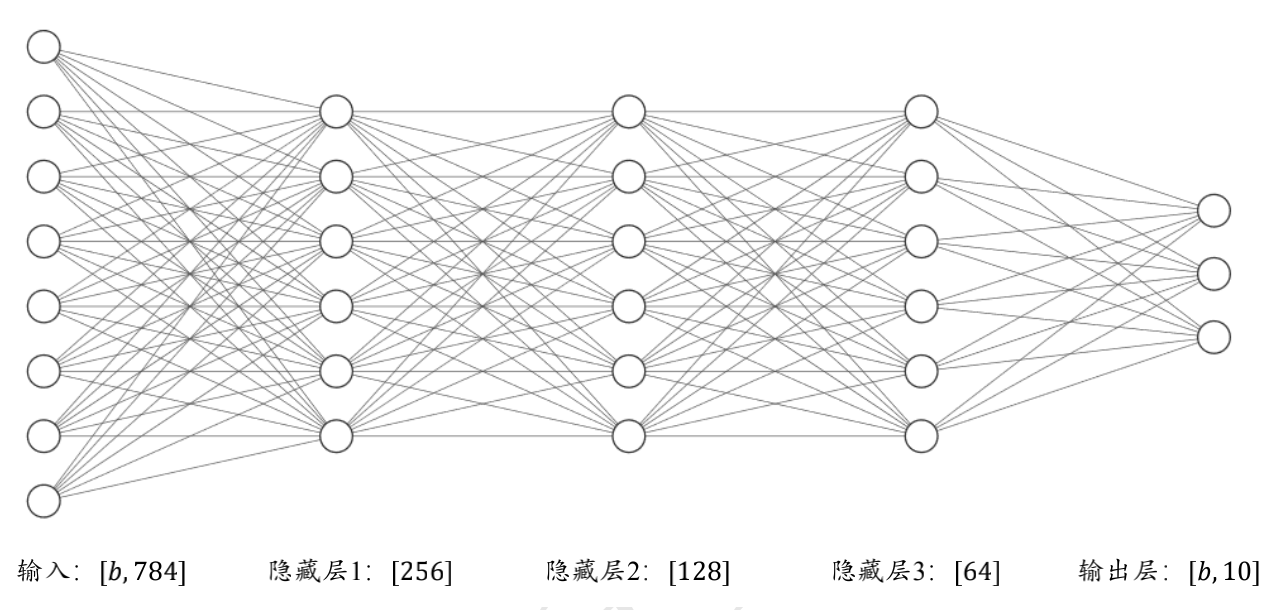